## Working Directory


In [1]:
%pwd

'C:\\Users\\javeg'

## 1. Read Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

### Structure of the data

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.data.shape

(70000, 784)

## 2. Data preprocessing
Let's separate Data from Target

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Difficult to visualize, let's improve the visualization:

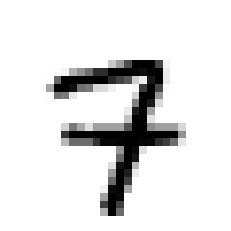

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = X[324]
any_digit_image = un_numero.reshape(28,28)
plt.imshow(any_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

And what does the target say?

In [12]:
y[324]

'7'

In [13]:
y.shape


(70000,)

Now let's create the training set and the test set

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_test.shape

(10000,)

## 3. Model Creation

In [16]:
import numpy as np

# Delete the comment sign "#" in the next two lines to use SGDClassifier
from sklearn.linear_model import SGDClassifier
my_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

#from sklearn.naive_bayes import GaussianNB
#my_model = GaussianNB()

## 4. Adjust model with Historic (training) Data

In [17]:
my_model.fit(X_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

## 5. Prediction for New (test) Data

For one number, in this case any_digit

In [18]:
my_model.predict([un_numero])

array(['7'], dtype='<U1')

For all the test data

In [19]:
y_predict = my_model.predict(X_test)

Let's se the first 5 digits for testing:

In [20]:
y_test[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype=object)

Now the predictions:

In [21]:
y_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype='<U1')

## 6. Visualization of Results
How good we did it?

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(my_model, X_train, y_train, cv=3, scoring="accuracy")

array([0.8684 , 0.85975, 0.85475])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 947,    0,    4,    9,    1,    3,   10,    2,    2,    2],
       [   0, 1069,   32,    6,    0,    4,   10,    2,   10,    2],
       [   7,    0,  923,   28,   10,    1,   17,   11,   31,    4],
       [   3,    0,   18,  924,    3,   26,    3,   14,   10,    9],
       [   3,    0,    3,    5,  919,    0,   16,    4,    4,   28],
       [  14,    2,    6,   72,   18,  698,   28,   10,   22,   22],
       [   7,    2,    6,    6,    3,    9,  924,    0,    1,    0],
       [   5,    4,   24,    6,    6,    2,    0,  955,    3,   23],
       [  15,    7,   28,   73,   21,   43,   34,   24,  715,   14],
       [   9,    4,    2,   17,   60,    9,    1,   94,    7,  806]],
      dtype=int64)

And that's all folks!

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.888

### Es 5 o no es 5

In [26]:
"No es 5"

'No es 5'

In [51]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [1]:
%matplotlib inline

from PIL import Image
jpgfile = Image.open("My7.jpg").convert('LA')

import matplotlib
import matplotlib.pyplot as plt
plt.imshow(jpgfile, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'My7.jpg'

# Performance Measures
## Training a Binary Classifier

In [27]:
y_train_5 = (y_train == "5") # True for all 5s, False for all other digits.
y_test_5 = (y_test == "5")

In [28]:
y_test_5[:10]

array([False, False, False, False, False, False, False, False,  True,
       False])

In [29]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [30]:
from sklearn.linear_model import SGDClassifier

X_tt = X_train[:]
X_tt = X_tt.reshape(60000,784)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_tt, y_train_5)

SGDClassifier(random_state=42)

In [31]:
sgd_clf.predict([X_tt[0]])

array([ True])

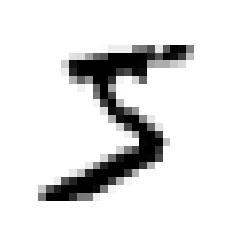

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_tt[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [33]:
y_predict_5 = sgd_clf.predict(X_test)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_tt, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [36]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [37]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [38]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_tt, y_train_5, cv=3)
print(y_train_pred.shape)

(60000,)


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [40]:
y_train_perfect_predictions = y_train_5.copy()
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [41]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [42]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [43]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [45]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

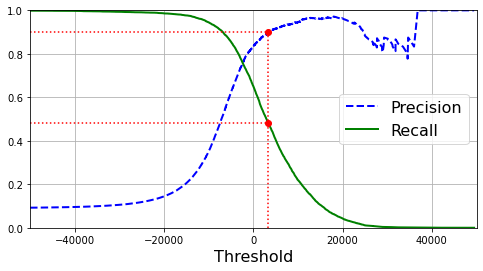

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
# save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

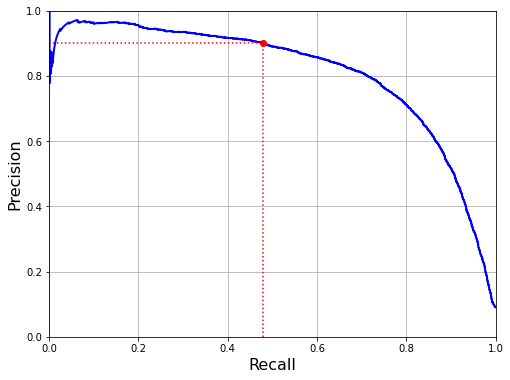

In [48]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
# save_fig("precision_vs_recall_plot")
plt.show()

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

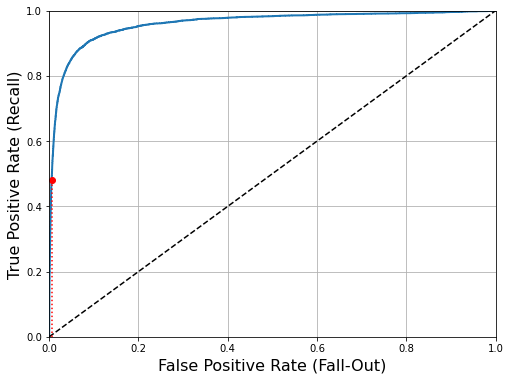

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616